# Occupation rate per neighborhood
## Name: Yujie Wen (YUW250)

# Introduction

In this project, we seek to determine the "best" neighborhood in Pittsburgh by analyzing local demographics and occupational statistics. The concept of "best" can vary significantly depending on the metrics considered, which include factors such as safety, education, amenities, and employment opportunities. For our analysis, we focus on employment as a primary indicator, assessing the diversity and distribution of occupations across neighborhoods.

The process involved in deciding on this metric started with a brainstorming session where we considered various aspects of neighborhood livability including education levels, income statistics, housing stability, and job opportunities. After reviewing available datasets, we chose to use occupational data because it provides a tangible measure of economic activity and professional diversity, which are key indicators of a neighborhood’s vibrancy and growth potential.

# The Metric

The metric we chose revolves around occupational diversity and gender representation in the workforce. We believe that a neighborhood that shows a diverse range of occupations and a balanced gender representation among those occupations might offer a more inclusive and sustainable environment.

## Data Description

We are utilizing the "Sex by Occupation" dataset from the Pittsburgh American Community Survey Census Data from 2014. This dataset includes detailed breakdowns of the types of occupations held by residents, categorized by sex, across different neighborhoods. It provides insights into the kind of work residents are engaged in, which helps in understanding the economic fabric of each neighborhood.

**Data Source:**
- **Dataset Name:** Sex by Occupation for the Civilian Employed Population 16 Years and Over
- **URL:** [Sex by Occupation Dataset](https://data.wprdc.org/dataset/378e4a6c-550c-4e9c-bfb5-ca73c1c29cc7/resource/0b520f07-3f9d-48ce-8e9e-039cddd28417/download/sex-by-occupation-for-the-civilian-employed-population-16-years-and-over.csv)
- **Description:** This dataset collects information on the civilian employed population over 16 years based on their reported primary occupations, classified by sex. The dataset was compiled from responses to the 2015 American Community Survey (ACS), which asks respondents to describe their primary job duties and the industry of their employment.

## Analytical Approach

To analyze this data, we will:
1. Calculate the total number of employed individuals in each neighborhood.
2. Assess the diversity of occupations using the Shannon-Wiener Diversity Index, a commonly used measure in ecological studies adapted here to measure occupational diversity.
3. Evaluate gender balance in each occupation within neighborhoods.

By combining these analyses, we can score and rank neighborhoods to identify which one could be considered the "best" in terms of occupational diversity and gender equality in the workforce. This comprehensive approach allows us to provide a nuanced view of the employment landscape across Pittsburgh's neighborhoods.

## The Metric: Defining the "Best" Neighborhood in Pittsburgh

Our study aims to identify the most thriving neighborhood in Pittsburgh using a data-driven approach. The key indicators for our analysis are occupational diversity and gender representation within the civilian employed population. We hypothesize that the "best" neighborhood will demonstrate not only a robust and diverse job market but also equitable gender participation in various occupational sectors. 

### Features Measured:

- **Occupational Diversity**: We evaluate the range of job categories within each neighborhood, from management and business roles to science and arts occupations, as well as service and labor positions. A broad spectrum of job types indicates a neighborhood's economic versatility and potential for sustained growth.

- **Gender Representation**: The balance between male and female representation in different occupations is scrutinized to understand how equitable employment opportunities are across genders in each area. This balance is a crucial aspect of social sustainability and inclusiveness.

- **Total Employment**: The total count of employed residents offers insight into the neighborhood's economic activity level. High employment suggests a dynamic job market, which is an attractive trait for both current and potential residents.



By analyzing this dataset, we aim to paint a detailed picture of Pittsburgh's neighborhoods, identifying not just economic hotspots but also communities that show a commitment to diversity and equality. This metric will serve as a valuable tool for local decision-makers, investors, and residents alike, providing insights that go beyond mere economic output to capture the essence of what truly makes a neighborhood "the best."


# Note
high-level jobs typically fall under the following categories:

* Management, business, and financial occupations

* Computer, engineering, and science occupations

* Education, legal, community service, arts, and media occupations

* Healthcare practitioners and technical occupations



In [1]:
# Load the necessary libraries
import pandas as pd

# Load the dataset
data_path = 'sex_by_occupation.csv'
occupation = pd.read_csv(data_path)

# Rename
# Define a dictionary mapping old column names to new column names
column_rename_enroll = {
    "Estimate; Total:": "total occupation",
    "Estimate; Male: - Management, business, science, and arts occupations: - Healthcare practitioners and technical occupations:": "male: - Healthcare practitioners and technology",
    "Estimate; Female: - Management, business, science, and arts occupations: - Healthcare practitioners and technical occupations:": "female: - Healthcare practitioners and technology",
    "Estimate; Male: - Management, business, science, and arts occupations: - Education, legal, community service, arts, and media occupations:": "male: Education, legal, community service, arts, and media",
    "Estimate; Female: - Management, business, science, and arts occupations: - Education, legal, community service, arts, and media occupations:": "female: Education, legal, community service, arts, and media",
    "Estimate; Male: - Management, business, science, and arts occupations: - Computer, engineering, and science occupations:": "male: Computer, engineering, and science",
    "Estimate; Female: - Management, business, science, and arts occupations: - Computer, engineering, and science occupations:": "female: Computer, engineering, and science",
    "Estimate; Male: - Management, business, science, and arts occupations: - Management, business, and financial occupations:": "male: Management, business, and finance",
    "Estimate; Female: - Management, business, science, and arts occupations: - Management, business, and financial occupations:": "female: Management, business, and finance"
}


occupation.rename(columns=column_rename_enroll, inplace=True)
columns_to_include = ['Neighborhood'] + list(column_rename_enroll.values())

# Subset the DataFrame to only include the specified columns
occupation_data = occupation[columns_to_include]

# Display the first few rows to understand the structure
print(occupation_data.head())

        Neighborhood  total occupation  \
0   Allegheny Center             579.0   
1     Allegheny West             221.0   
2          Allentown             841.0   
3          Arlington             991.0   
4  Arlington Heights              80.0   

   male: - Healthcare practitioners and technology  \
0                                             51.0   
1                                              7.0   
2                                              7.0   
3                                              0.0   
4                                              0.0   

   female: - Healthcare practitioners and technology  \
0                                               13.0   
1                                                6.0   
2                                              146.0   
3                                               14.0   
4                                                0.0   

   male: Education, legal, community service, arts, and media  \
0                   

In [8]:
import warnings

# Copy the DataFrame to avoid SettingWithCopyWarning on the original DataFrame
#occupation_data = occupation_data.copy()

# Ignore the SettingWithCopyWarning specifically
#warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

# Assign new column values without indentation issues
occupation_data.loc[:, 'Healthcare practitioners and technology'] = (
    occupation_data['male: - Healthcare practitioners and technology'] +
    occupation_data['female: - Healthcare practitioners and technology']
)

occupation_data.loc[:, 'Education, legal, community service, arts, and media'] = (
    occupation_data['male: Education, legal, community service, arts, and media'] +
    occupation_data['female: Education, legal, community service, arts, and media']
)

occupation_data.loc[:, 'Computer, engineering, and science'] = (
    occupation_data['male: Computer, engineering, and science'] +
    occupation_data['female: Computer, engineering, and science']
)

occupation_data.loc[:, 'Management, business, and finance'] = (
    occupation_data['male: Management, business, and finance'] +
    occupation_data['female: Management, business, and finance']
)



In [9]:
occupation_data = occupation_data[['Neighborhood', 'total occupation', 
                                   'Healthcare practitioners and technology',
                                   'Education, legal, community service, arts, and media',
                                   'Computer, engineering, and science',
                                   'Management, business, and finance']]
print(occupation_data)

           Neighborhood  total occupation  \
0      Allegheny Center             579.0   
1        Allegheny West             221.0   
2             Allentown             841.0   
3             Arlington             991.0   
4     Arlington Heights              80.0   
..                  ...               ...   
86  Upper Lawrenceville            1518.0   
87             West End             186.0   
88         West Oakland             656.0   
89             Westwood            1798.0   
90              Windgap             695.0   

    Healthcare practitioners and technology  \
0                                      64.0   
1                                      13.0   
2                                     153.0   
3                                      14.0   
4                                       0.0   
..                                      ...   
86                                    141.0   
87                                      3.0   
88                                  

In [10]:
data_population = "population.csv"
population_data = pd.read_csv(data_population)

population_data['total population'] = population_data['Estimate; Total'] + population_data['Margin of Error; Total']

# Merge the two dataframes on the "Neighborhood" column
occupation_population = pd.merge(occupation_data, population_data, on="Neighborhood", how="inner")

# Calculate rate
occupation_population['Total occupation rate'] = (occupation_population['total occupation'] / occupation_population['total population']) * 100
occupation_population['Healthcare practitioners and technology rate'] = (occupation_population['Healthcare practitioners and technology'] / occupation_population['total population']) * 100
occupation_population['Education, legal, community service, arts, and media rate'] = (occupation_population['Education, legal, community service, arts, and media'] / occupation_population['total population']) * 100
occupation_population['Computer, engineering, and science rate'] = (occupation_population['Computer, engineering, and science'] / occupation_population['total population']) * 100
occupation_population['Management, business, and finance rate'] = (occupation_population['Management, business, and finance'] / occupation_population['total population']) * 100

occupation_rate = occupation_population[['Neighborhood', 'Total occupation rate', 
                                         'Healthcare practitioners and technology rate',
                                         'Education, legal, community service, arts, and media rate',
                                         'Computer, engineering, and science rate',
                                         'Management, business, and finance rate']]
print(occupation_rate)

           Neighborhood  Total occupation rate  \
0      Allegheny Center              36.029869   
1        Allegheny West              50.341686   
2             Allentown              27.960884   
3             Arlington              45.041602   
4     Arlington Heights              20.100503   
..                  ...                    ...   
86  Upper Lawrenceville              47.590554   
87             West End              49.865952   
88         West Oakland              32.767204   
89             Westwood              45.576878   
90              Windgap              36.543774   

    Healthcare practitioners and technology rate  \
0                                       3.982576   
1                                       2.961276   
2                                       5.086820   
3                                       0.636309   
4                                       0.000000   
..                                           ...   
86                                 

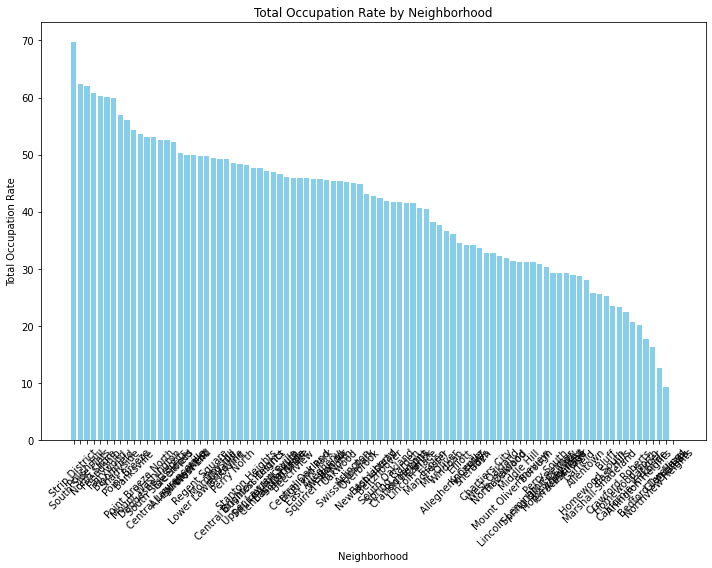

In [11]:
import matplotlib.pyplot as plt

# Sorting the data in descending order by 'Total occupation rate'
occupation_rate_sorted = occupation_rate.sort_values(by='Total occupation rate', ascending=False)

# Creating a bar chart
plt.figure(figsize=(10, 8))  # You can adjust the size to fit your needs
plt.bar(occupation_rate_sorted['Neighborhood'], occupation_rate_sorted['Total occupation rate'], color='skyblue')
plt.xlabel('Neighborhood')  # Label for the x-axis
plt.ylabel('Total Occupation Rate')  # Label for the y-axis
plt.title('Total Occupation Rate by Neighborhood')  # Title of the chart
plt.xticks(rotation=45)  # Rotates the labels on the x-axis to avoid overlapping
plt.tight_layout()  # Adjusts subplots to give some padding
plt.show()


In [16]:
occupation_rate_sorted = occupation_rate.sort_values(by='Total occupation rate', ascending=False)
output_path = 'occupation_rate.csv'

# Save the sorted dataframe to a CSV file
occupation_rate_sorted.to_csv(output_path, index=False)

# Select the top 10 neighborhoods
top_10_neighborhoods = occupation_rate_sorted.head(10)
print(top_10_neighborhoods)

        Neighborhood  Total occupation rate  \
80    Strip District              69.678954   
72  South Side Flats              62.446800   
65       Polish Hill              62.046781   
57       North Shore              60.716839   
33        Friendship              60.293637   
31         Fairywood              60.112755   
9         Bloomfield              59.866720   
68         Shadyside              57.009211   
63      Point Breeze              56.124308   
5         Banksville              54.267665   

    Healthcare practitioners and technology rate  \
80                                      5.231867   
72                                      5.682147   
65                                      1.926506   
57                                     12.511349   
33                                      5.929744   
31                                      3.946441   
9                                       6.528136   
68                                      7.716314   
63            

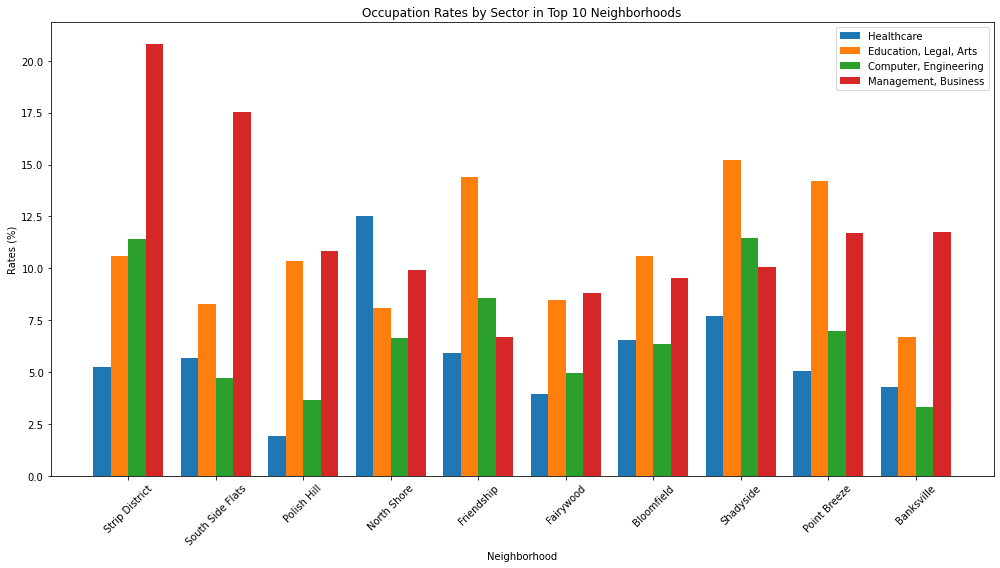

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
n = len(top_10_neighborhoods)  # number of neighborhoods
index = np.arange(n)  # group locations
bar_width = 0.2  # width of bars

# Creating the plot
fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(index, top_10_neighborhoods['Healthcare practitioners and technology rate'], bar_width, label='Healthcare')
bar2 = ax.bar(index + bar_width, top_10_neighborhoods['Education, legal, community service, arts, and media rate'], bar_width, label='Education, Legal, Arts')
bar3 = ax.bar(index + 2 * bar_width, top_10_neighborhoods['Computer, engineering, and science rate'], bar_width, label='Computer, Engineering')
bar4 = ax.bar(index + 3 * bar_width, top_10_neighborhoods['Management, business, and finance rate'], bar_width, label='Management, Business')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Rates (%)')
ax.set_title('Occupation Rates by Sector in Top 10 Neighborhoods')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(top_10_neighborhoods['Neighborhood'], rotation=45)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


# Why employment in education is most important for community assessment

### 1. Educational outcomes and quality
- **Direct Impact**: Teachers and educators have a direct impact on the quality of education students receive. Higher employment rates in education indicate higher student-to-teacher ratios, which are associated with more individualized attention and improved student achievement.
- **Educational Resources**: Communities that invest in education jobs typically allocate more resources to schools, improving the learning environment through better facilities and materials.

### 2. Economic Development
- **Long-Term Growth**: Education drives long-term economic growth, and a well-educated population has a higher capacity for innovation, productivity, and economic stability.
- **Workforce Attraction**: Areas with strong educational employment attract families seeking a quality schooling, bringing skilled workers and their families to the area.

### 3. Community Involvement and Stability
- **Role Models**: Educators are role models and community leaders, influencing not only education, but also moral and social standards.
- **Civic Engagement **: Educational institutions often become centers of community activity and civic engagement, promoting community cohesion and participation.

### 4. Social mobility and equality
- **Access to education**: More education jobs mean more access to education for all socio-economic groups, contributing to social mobility and reducing inequality.
- **Specialized Education Programs**: More educators can offer more specialized programs to meet the needs of diverse students, including special education and vocational training.

### 5. Health and well-being
- **Informed Populations**: Educated communities are often better informed about health, nutrition, and lifestyle, leading to better public health outcomes.
- **Stress and Mental Health**: Schools provide important services such as counseling and mental health support that contribute to the overall well-being of the community.

### 6. Cultural Development and Preservation
- **Cultural Transmission**: Schools play an important role in transmitting cultural values and historical knowledge and preserving cultural heritage.
- **Adaptation and Innovation**: Education fosters a culture of adaptation and innovation, which is essential in a rapidly changing world.

# Conclusion
Using the data, the four high-paying occupations we selected, and the total population of each community, we calculated the employment rate for each community. Because there was so much data, I picked out the top ten neighborhoods with the highest employment rates. I then compared these ten neighborhoods again and created a table. I compared the employment rates for the four highest-paying occupations in these ten neighborhoods. Out of these four high-paying careers, I think education is the most important, and after comparing, we can conclude **Shadyside** is the best neighborhood.